합성곱 신경망을 이용한 이미지 분류

In [1]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(X_train,y_train),(X_test,y_test) =  keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

Convolution 은 차수를 3차원으로 맞춰야 함

In [4]:
X_train_scaled = X_train.reshape(-1,28,28,1) / 255.0
XTrain,XVal,yTrain,yVal =  train_test_split(X_train_scaled,y_train,test_size=0.2,random_state=2)

In [5]:
X_train_scaled.shape

(60000, 28, 28, 1)

합성곱 신경망 만들기

In [22]:
def make_model():
  model = keras.Sequential()
  # 커널수
  model.add(keras.layers.Conv2D(32,kernel_size=3 ,activation='relu',padding='same', input_shape=(28,28,1) )  )
  model.add( keras.layers.MaxPool2D(2)  )  # 반으로 줄인다.
  model.add(keras.layers.Dropout(0.4))

  model.add(keras.layers.Conv2D(64,kernel_size=3 ,activation='relu',padding='same' )  )
  model.add( keras.layers.MaxPool2D(2)  )  # 반으로 줄인다.
  model.add(keras.layers.Dropout(0.4))

  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(100,activation='relu')    )
  model.add(keras.layers.Dropout(0.4)   )
  model.add(keras.layers.Dense(10,activation='softmax')    )
  return model


In [15]:
model = make_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

In [16]:

# conv2d_1 (Conv2D)           (None, 28, 28, 32)        320
# (input_channel x kernel_size + 1)*output_channel
(3*3+1)*32

# (None, 14, 14, 64)
(3*3*32+1)*64

18496

모델 컴파일 과 훈련

In [23]:
model = make_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('cnn_model.keras',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model.fit(XTrain,yTrain,epochs=100, validation_data=(XVal,yVal), callbacks=[checkpoint_cb, early_stopping_cb]    )

Epoch 1/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.6296 - accuracy: 0.7666 - val_loss: 0.3787 - val_accuracy: 0.8610
Epoch 2/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4302 - accuracy: 0.8445 - val_loss: 0.3149 - val_accuracy: 0.8818
Epoch 3/100
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3801 - accuracy: 0.8631 - val_loss: 0.2965 - val_accuracy: 0.8913
Epoch 4/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3526 - accuracy: 0.8719 - val_loss: 0.2796 - val_accuracy: 0.8946
Epoch 5/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3268 - accuracy: 0.8809 - val_loss: 0.2682 - val_accuracy: 0.9028
Epoch 6/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3143 - accuracy: 0.8862 - val_loss: 0.2492 - val_accuracy: 0.9066
Epoch 7/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3066 - accuracy: 0.8866 - val_loss: 0.2420 - val_a

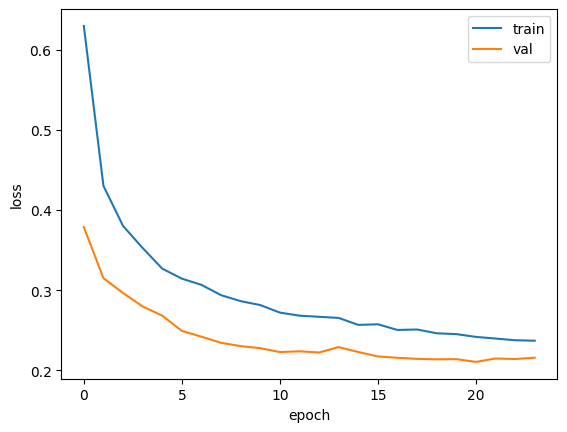

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [25]:
X_test_scaled = X_test.reshape(-1,28,28,1)/255.0

model.evaluate(X_test_scaled,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2233 - accuracy: 0.9185


[0.22326591610908508, 0.9185000061988831]